Copyright (c) 2022 Mitsuru Ohno  
Use of this source code is governed by a BSD-3-style  
license that can be found in the LICENSE file.  
  
07/30/2022, M. Ohno  
an example script of monomer categolization and polymer generation from a list of small molecule compounds given as SMILES.    

In [1]:
import numpy as np
import pandas as pd
import time
from smipoly.smip import monc, polg

In [2]:
#read source file
DF = pd.read_csv("https://raw.githubusercontent.com/PEJpOhno/SMiPoly/main/sample_data/202207_smip_monset.csv") #sample monomer list on GitHub  
DF

,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol"
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol"
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine"
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid
...,...,...,...,...,...
1078,CID91972128,C22H10N4,330.30,C=CC1=CC2=C(C=C1)C(=C(C#N)C#N)C3=CC=CC=C3C2=C(...,2-[10-(dicyanomethylidene)-3-ethenylanthracen-...
1079,CID102529357,C14H30O5Si,306.47,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,trimethoxy-[8-(oxiran-2-ylmethoxy)octyl]silane
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...


classify monomers  

In [ ]:
DF02 = monc.moncls(df=DF, smiColn='SMILES', dsp_rsl=True)

In [ ]:
DF02

generate polymers  

In [ ]:
#read source DataFrame
tpstart = time.perf_counter()
DF03 = polg.biplym(df=DF02, targ=['polyether', ], Pmode='a', dsp_rsl=True)
tpend = time.perf_counter()
tm = tpend-tpstart
print("CPU time: ", tm)
print(f"DF03 memory usage: {DF03.memory_usage(deep=True).sum() / 1024 ** 2} MB")

In [ ]:
DF03

In [ ]:
#extract linear polymer
DF04 = DF03[DF03['polym'].apply(lambda x:x.count('*')==2)]
DF05 = DF04.drop_duplicates(subset=['polym'])
DF05

In [ ]:
import random
from rdkit import Chem
from rdkit.Chem import Draw

an example of generated polymer and polynerization reaction  

In [ ]:
#Draw examples of generated polymer CRU
pickupNos = [random.randint(0, 50) for i in range(len(DF03))]
examP = [Chem.MolFromSmiles(DF03.iloc[i, 2]) for i in pickupNos]
Draw.MolsToGridImage(examP,molsPerRow=4, subImgSize=(200,200))

In [ ]:
#Draw example of generated polymerization reaction
pickupNo = int(random.randint(0,len(DF03)))
print(pickupNo)
m1=Chem.MolFromSmiles(DF03.iloc[pickupNo,0])
m2=Chem.MolFromSmiles(DF03.iloc[pickupNo,1])
p=Chem.MolFromSmiles(DF03.iloc[pickupNo,2])
if DF03.iloc[pickupNo,1] != '':
    L = [m1, m2, p]
else:
    m2 = Chem.MolFromSmiles('') #None
    L = [m1, m2, p]
Draw.MolsToGridImage(L,molsPerRow=3, subImgSize=(300,300))

Classify olefins

In [3]:
DF_ole = monc.olecls(df=DF, smiColn='SMILES', dsp_rsl=True)
DF_ole

['acryl', 'bEWole', 'styryl', 'allyl', 'conjdiene', 'vinylether', 'vinylester', 'malei', 'cycCHX', 'aliphCHX']
acryl  =  221  /  1083
bEWole  =  4  /  1083
styryl  =  54  /  1083
allyl  =  76  /  1083
conjdiene  =  3  /  1083
vinylether  =  20  /  1083
vinylester  =  26  /  1083
malei  =  18  /  1083
cycCHX  =  13  /  1083
aliphCHX  =  56  /  1083


,comID,MolecularFormula,MolecularWeight,SMILES,IUPACName,smip_cand_mons,ole_cls
0,CID174,C2H6O2,62.07,C(CO)O,"ethane-1,2-diol",OCCO,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
1,CID196,C6H10O4,146.14,C(CCC(=O)O)CC(=O)O,hexanedioic acid,O=C(O)CCCCC(=O)O,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
2,CID262,C4H10O2,90.12,CC(C(C)O)O,"butane-2,3-diol",CC(O)C(C)O,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
3,CID273,C5H14N2,102.18,C(CCN)CCN,"pentane-1,5-diamine",NCCCCCN,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
4,CID371,C4H2O4,114.06,C(#CC(=O)O)C(=O)O,but-2-ynedioic acid,O=C(O)C#CC(=O)O,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
...,...,...,...,...,...,...,...
1078,CID91972128,C22H10N4,330.30,C=CC1=CC2=C(C=C1)C(=C(C#N)C#N)C3=CC=CC=C3C2=C(...,2-[10-(dicyanomethylidene)-3-ethenylanthracen-...,C=Cc1ccc2c(=C(C#N)C#N)c3ccccc3c(=C(C#N)C#N)c2c1,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
1079,CID102529357,C14H30O5Si,306.47,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,trimethoxy-[8-(oxiran-2-ylmethoxy)octyl]silane,CO[Si](CCCCCCCCOCC1CO1)(OC)OC,"{'acryl': [False, 0, nan], 'bEWole': [False, 0..."
1080,CID125370311,C15H24O2Si,264.43,C=CC[Si](CCCOC(=O)C=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl prop-2-enoate,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C=C,"{'acryl': [True, 1, '*CC(*)C(=O)OCCC[Si](CC=C)..."
1081,CID125401955,C16H26O2Si,278.46,CC(=C)C(=O)OCCC[Si](CC=C)(CC=C)CC=C,3-tris(prop-2-enyl)silylpropyl 2-methylprop-2-...,C=CC[Si](CC=C)(CC=C)CCCOC(=O)C(=C)C,"{'acryl': [True, 1, '*CC(*)(C)C(=O)OCCC[Si](CC..."


Generate copolymer

In [4]:
DF_ole_copol = polg.ole_copolym(DF_ole, targ=['bEWole'], ncomp=1, dsp_rsl=True)
DF_ole_copol

Number of generated (co)polymer,  1  component(s) system :  4


,mon1,mon2,polym,polymer_class,Ps_rxnL,reactset
0,,,[*CC(*)C#N],[bEWole],NaN,[C=CC#N]
1,,,[*CC(*)(C)C#N],[bEWole],NaN,[C=C(C)C#N]
2,,,[*CC(*)S(=O)(=O)O],[bEWole],NaN,[C=CS(=O)(=O)O]
3,,,[*CC(*)(Cl)C#N],[bEWole],NaN,[C=C(Cl)C#N]


In [5]:
from rdkit import Chem
from rdkit.Chem import Draw

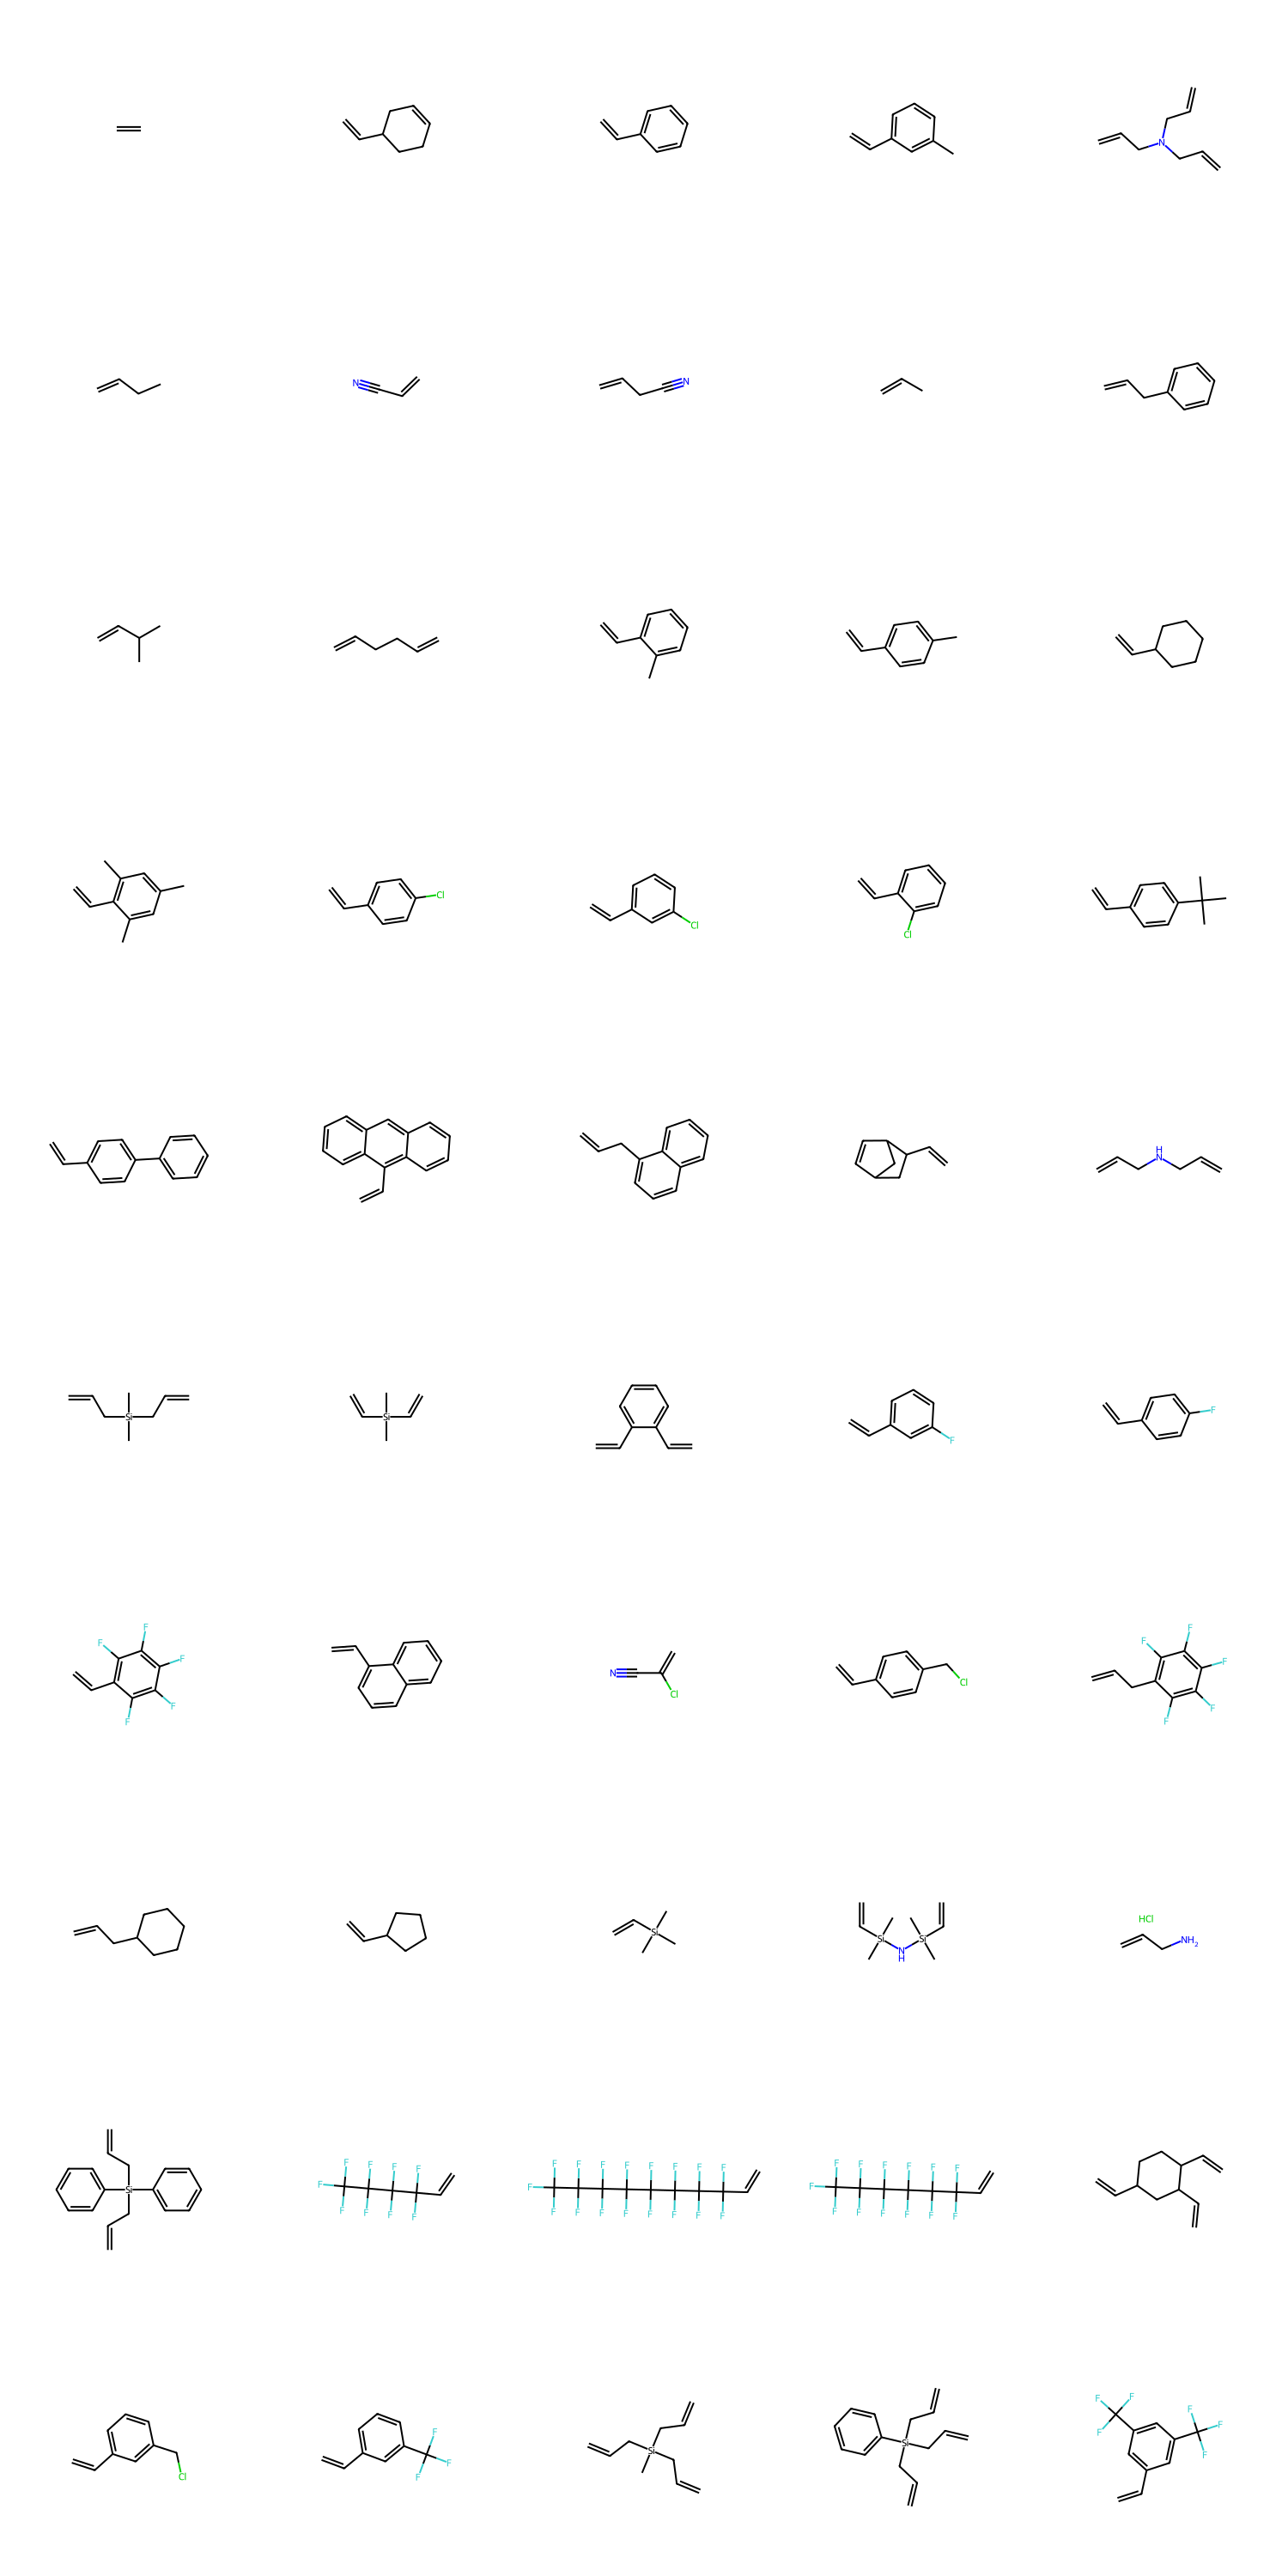

In [8]:
DF_clsd_ole = DF_ole.loc[DF_ole['ole_cls'].apply(lambda x: x['aliphCHX'][0]), 'smip_cand_mons']
m_clsd_ole = [Chem.MolFromSmiles(e) for e in DF_clsd_ole]
img = Draw.MolsToGridImage(m_clsd_ole, molsPerRow=5, subImgSize=(300, 300))
img

In [ ]:
#end